## Residual Analyses for ground motion model

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use

use('seaborn-v0_8-paper')

# ground motion database
csvfile3 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/quality/ground_motion_im_table_rotd50_flat.csv'
db3 = pd.read_csv(csvfile3)

# select stations in backarc and forearc
# require the polygon of TVZ region defined by Lee and Bora.

tvzfile = '/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/def_tvz_v3.csv'
tvztable = pd.read_csv(tvzfile)

forefile = '/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/def_forearc_v4.csv'
foretable = pd.read_csv(forefile)

/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_11123/4192561394.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  db3 = pd.read_csv(csvfile3)


In [414]:
import matplotlib.pyplot as plt
import sys

# Add custom path
sys.path.insert(0, '/Users/DuoL/Documents/PythonPath')

# Option A: Use style file
plt.style.use('/Users/DuoL/Documents/PythonPath/custom_plot_style.mplstyle')

# OR Option B: Use Python config
# import plot_config
# plot_config.setup_plots(save_dpi=300)

In [415]:
# full database

csvfile3 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/quality/ground_motion_im_table_rotd50_flat.csv'
db3 = pd.read_csv(csvfile3)

# csvfile3 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/quality/earthquake_source_table.csv'
# db3_sr = pd.read_csv(csvfile3)

# csvfile3 = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/full_nzgmdb/earthquake_source_table.csv'
# db4_sr = pd.read_csv(csvfile3)


/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_11123/3895488451.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  db3 = pd.read_csv(csvfile3)


In [11]:
# relocated file
relfile = '/Users/DuoL/Documents/NSHM/Attenuation/relocation/relocated_2001-2011.csv'
reltable = pd.read_csv(relfile)
print('relocated events:', len(reltable))
print(reltable.keys()  )

reltable['mag'] = reltable['magnitude'].astype(float)
mask1 = reltable['mag'].between(6.0,8.0,inclusive='both')

reltable_m5= reltable[mask1][['datetime','latitude','longitude','depth','mag']]

reltable_m5.to_csv('/Users/DuoL/Documents/NSHM/Attenuation/relocation/relocated_2001-2011_m6.csv', index=False)

print(reltable_m5.__len__())

relocated events: 214472
Index(['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'latitude', 'longitude', 'depth', 'magnitude', 'nobs', 'wrmsr', 'x',
       'y', 'gap', 'dmin', 'rzdm', 'np', 'ns', 'serot', 'serh', 'serz',
       'qcode'],
      dtype='object')
25


In [ ]:
# print(db4_sr[db4_sr['mag']>=5.8]['datetime'].unique())

print(db4_sr.keys(),db3.keys())

print(db3_sr['evid'].unique().__len__() )
print(db4_sr['evid'].unique().__len__() )


mask1=db4_sr['mag'].between(5.8,8.0,inclusive='both')
db4_sr_m5 = db4_sr[mask1][['datetime','lon', 'lat', 'depth', 'mag', 'evid']]
db4_sr_m5['year'] = db4_sr_m5['datetime'].str[:4].astype(int)

print(db4_sr_m5.keys())

mask = db4_sr_m5['year'].between(2001, 2011,inclusive='both')
db4_sr_m5_2001_2011 = db4_sr_m5[mask]



print('events M6+ 2001-2011:', db4_sr_m5_2001_2011.__len__() )

# print(db4_sr[db4_sr['evid']=='2018p816466']['lon'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['depth'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['lat'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['mag_orig_type'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['mag_type'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['mag_method'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['mag_orig_unc'].unique())

# print(db4_sr[db4_sr['evid']=='2018p816466']['f_length'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['f_width'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['z_tor'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['z_bor'].unique())
# print(db4_sr[db4_sr['evid']=='2018p816466']['f_type'].unique())


# print(db4[db4['evid']=='2018p816466']['sta'].isin(backarc_list).sum())



Index(['evid', 'datetime', 'lat', 'lon', 'depth', 'loc_type', 'loc_grid',
       'mag', 'mag_type', 'mag_method', 'mag_unc', 'mag_orig', 'mag_orig_type',
       'mag_orig_unc', 'ndef', 'nsta', 'nmag', 't_res', 'reloc', 'tect_class',
       'tect_method', 'domain_no', 'domain_type', 'strike', 'dip', 'rake',
       'f_length', 'f_width', 'f_type', 'z_tor', 'z_bor',
       'aftershock_flag_crjb0', 'cluster_flag_crjb0', 'aftershock_flag_crjb2',
       'cluster_flag_crjb2', 'aftershock_flag_crjb5', 'cluster_flag_crjb5',
       'aftershock_flag_crjb10', 'cluster_flag_crjb10'],
      dtype='object') Index(['record_id', 'datetime', 'evid', 'sta', 'loc', 'chan', 'component',
       'ev_lat', 'ev_lon', 'ev_depth',
       ...
       'pSA_10.0', 'pSA_11.0', 'pSA_12.0', 'pSA_13.0', 'pSA_14.0', 'pSA_15.0',
       'pSA_20.0', 'evid_sta', 'dist_fore', 'dist_tvz'],
      dtype='object', length=191)
3928
3928
Index(['datetime', 'lon', 'lat', 'depth', 'mag', 'evid', 'year'], dtype='object')
events M5-M6 

In [ ]:
# compare the locations

fig, ax = plt.subplots(figsize=(8, 6))

# Plot coastline
ax.plot(coast[0,:], coast[1,:], 'k-', linewidth=1.5, alpha=0.7, zorder=1)

# Plot data
ax.scatter(db4_sr_m5_2001_2011['lon'], db4_sr_m5_2001_2011['lat'], 
           marker='o', s=60, color='royalblue', label='NZGMDB M5-6 2001-2011', 
           edgecolors='darkblue', linewidth=0.5, alpha=0.7, zorder=3)
ax.scatter(reltable_m5['longitude'], reltable_m5['latitude'], 
           marker='x', s=80, color='tomato', label='Relocated M5-6 2001-2011', 
           linewidth=2, alpha=0.8, zorder=4)

# Styling
ax.set_xlim(165, 180)
ax.set_ylim(-48, -34)
ax.set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
ax.set_title('Event Location Comparison (2001-2011)', fontsize=13, fontweight='bold', pad=15)
ax.legend(loc='best', frameon=True, shadow=True, fontsize=10)
ax.grid(True, which='both', linestyle=':', alpha=0.4)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('event_location_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


#### Select slab events and sites in specific teconic zone

In [425]:
from GMfunc.functions_polygon import point_to_polygon_distance, point_to_polygon_distance_vectorized

dist_tvz = point_to_polygon_distance_vectorized(db3[['sta_lon','sta_lat']].values, tvztable[['longitude','latitude']].values)

print('distances to tVZ:',dist_tvz.min(), dist_tvz.max()  )

dist_fore = point_to_polygon_distance_vectorized(db3[['sta_lon','sta_lat']].values, foretable[['longitude','latitude']].values) 

print('distance to forearc:',dist_fore.min(), dist_fore.max()  )


distances to tVZ: 0.0 10.764016889912794
distance to forearc: 0.0 6.829540800354951


In [ ]:
# forarce and inslab events

db3['dist_fore'] = dist_fore
db3['dist_tvz'] = dist_tvz

events_select = 'Slab'

if (events_select=='Slab'):
    model_tag = 'slab'
else:
    model_tag = 'inter'

print(model_tag)

db3_ss = db3[db3['tect_class']==events_select]
print(db3_ss['mag_type'].unique())

db3_mag = db3_ss[db3_ss['mag_type']=='Mw']

print(db3_mag['mag_type'].unique())

mask1 = db3_mag['Vs30'].between(100,1000,inclusive='both')
db3_ss1 = db3_mag[mask1].copy()

# print(db3.keys())

db3_s5 = db3_ss1[(db3_ss1['r_rup']<200.0)& (db3_ss1['mag']>4.0)].copy()
db3_s5["fmin"] = np.where(db3_s5["fmin_X"] > db3_s5["fmin_Y"], db3_s5["fmin_X"], db3_s5["fmin_Y"])

# check event number
event_counts = db3_s5['evid'].value_counts()

# Find events with more than 10 recordings
events_gt_10 = event_counts[event_counts > 5].index

# Filter the original dataframe
db3_s5_sel = db3_s5[db3_s5['evid'].isin(events_gt_10)]

print('events:',events_select)
print('length:',db3_s5_sel['evid'].unique().__len__())
# print('events:',db3_s5['evid'].unique())


print(f"Total events: {len(event_counts)}")
print(f"Min recordings per event: {event_counts.min()}")
print(f"Max recordings per event: {event_counts.max()}")
print(f"Mean recordings per event: {event_counts.mean():.1f}")
print(f"Median recordings per event: {event_counts.median():.1f}")


slab
['ML' 'Mw' 'MLv' 'Mb' 'Mw(mB)']
['Mw']
events: Slab
length: 319
Total events: 452
Min recordings per event: 1
Max recordings per event: 172
Mean recordings per event: 25.7
Median recordings per event: 13.0


nan nan


In [ ]:

# Plot source-to-site pairs with New Zealand coastline

# nz coastline data
# coastfile = '../Geometry/CoastNorth.txt.npy'
# coast =  np.load(coastfile)
# print(coast.shape)

# coastfile = '../Geometry/CoastSouth.txt'
# coastall = np.loadtxt(coastfile)
# coast2 = np.array([coastall[1,:],coastall[0,:]])
# print(coast2.shape)

# coast = np.concatenate((coast,coast2),axis=1)
# print(coast.shape)

events_select='Slab'
db3_s5_sel = pd.read_csv('rotD50/rot50_slab_m4_mw.csv')

print('Plot source-to-site pairs with coastline for', events_select)

fig, ax = plt.subplots(figsize=(6, 8))

# Plot coastline
ax.plot(coast[0,:], coast[1,:], '-', c='gray', linewidth=1.5, alpha=0.7, zorder=1, label='Coastline')

# Plot source-to-site pairs as lines
for idx, row in db3_s5_sel.iterrows():
    ax.plot([row['ev_lon'], row['sta_lon']], 
            [row['ev_lat'], row['sta_lat']], 
            '-', color='lightblue', linewidth=0.3, alpha=0.2, zorder=2)

# Plot event locations
ax.scatter(db3_s5_sel['ev_lon'], db3_s5_sel['ev_lat'], 
           marker='*', s=100, color='red', label='Events', 
           edgecolors='darkred', linewidth=0.8, alpha=0.8, zorder=4)

# Plot station locations
stations = db3_s5_sel[['sta_lon', 'sta_lat', 'sta']].drop_duplicates()
ax.scatter(stations['sta_lon'], stations['sta_lat'], 
           marker='^', s=80, color='blue', label='Stations', 
           edgecolors='darkblue', linewidth=0.8, alpha=0.8, zorder=3)

# Styling
ax.set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
ax.set_title(f'Source-to-Site Pairs - {events_select} Events', fontsize=13, fontweight='bold', pad=15)

# Add statistics text box
n_events = len(db3_s5_sel['evid'].unique())
n_stations = len(db3_s5_sel['sta'].unique())
n_records = len(db3_s5_sel)
textstr = f'Events: {n_events}\nStations: {n_stations}\nRecords: {n_records}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props, zorder=5)

ax.legend(loc='lower right', frameon=True, shadow=True, fontsize=10)
ax.grid(True, which='both', linestyle=':', alpha=0.4)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('source_to_site_pairs_' + events_select + '.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# overlap in BN and HN channels

df1 = db3_s5_sel[db3_s5_sel['chan']=='BN']

df2 = db3_s5_sel[db3_s5_sel['chan']=='HN']

df3 = df1[df1['evid'].isin(df2['evid'])]

# print(df3[df3['evid']=='2020p406638'])
db3_s5_sel[db3_s5_sel['evid']=='2020p406638']

In [ ]:
# event_counts=db3_s5_sel['evid'].value_counts()
# event_gt_10= event_counts[event_counts > 5].index
# df_sub1 = db3_s5_sel[db3_s5_sel['evid'].isin(event_gt_10)]

df_sub_m6 = df_sub1[df_sub1['mag']>=6.0]

m6_list = df_sub_m6['evid'].unique()

print(df_sub_m6[df_sub_m6['evid']==m6_list[3]])


# plt.figure(figsize=(6,6))
# plt.plot(coast[0,:],coast[1,:],'-',c='gray')
# plt.scatter(df_sub_m6['ev_lon'],df_sub_m6['ev_lat'],c=df_sub_m6['ev_depth'],cmap='viridis_r',s=10)
# plt.colorbar(label='Depth (km)')

# plt.savefig('event_map_mag6_slab.png',dpi=300)
# plt.show()

# print(df_sub1[df_sub1['chan']=='HN']['sta'].unique())

# double check if multiple channels
# print(df_sub1[df_sub1['sta']=='DAVS'])

In [428]:

# tvzfile = '/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/tvz_back_def.csv'
# tvzfile = '/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/def_tvz_v3.csv'

# tvztable = pd.read_csv(tvzfile)

# dist_tvz = point_to_polygon_distance_vectorized(db3[['sta_lon','sta_lat']].values, tvztable[['longitude','latitude']].values)

# print('distances to tVZ:',dist_tvz.min(), dist_tvz.max()  )


# db3_s5 = db3[dist_tvz<=0.01]
# db3_s5 = db3[dist_tvz<=0.01]

# print(db3[db3['sta']=='ROPS'])
# backarc_list_24 = db3_s5['sta'].unique()
# print()

# df_backarc_24 = pd.DataFrame({'sta': backarc_list_24})

# df_backarc_24.to_csv('/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/backarc_stations_24.csv', index=False)

df_backarc_24 = pd.read_csv('/Users/DuoL/Documents/NSHM/Attenuation/tectoniczone/backarc_stations_24.csv')
print('backarc list:', backarc_list_24.size)



backarc list: 24


In [850]:
# check records for each event: Slab or interface

print(db3_s5_sel.keys())

df_band_all=pd.DataFrame(
    {
        "r_rup": db3_s5_sel[
                "r_rup"
            ],  # if atk22, r_rup is used, while bc hydro uses r_hypo
            "PGA": db3_s5_sel["PGA"],
            "pSA_0.02": db3_s5_sel["pSA_0.02"],
            "pSA_0.04": db3_s5_sel["pSA_0.04"],
            "pSA_0.06": db3_s5_sel["pSA_0.06"],
            "pSA_0.08": db3_s5_sel["pSA_0.08"],
            "pSA_0.1": db3_s5_sel["pSA_0.1"],
            "pSA_0.2": db3_s5_sel["pSA_0.2"],
            "pSA_0.4": db3_s5_sel["pSA_0.4"],
            "pSA_0.6": db3_s5_sel["pSA_0.6"],
            "pSA_0.8": db3_s5_sel["pSA_0.8"],
            "pSA_1.0": db3_s5_sel["pSA_1.0"],
            "pSA_2.0": db3_s5_sel["pSA_2.0"],
            "pSA_4.0": db3_s5_sel["pSA_4.0"],
            "pSA_6.0": db3_s5_sel["pSA_6.0"],
            "pSA_8.0": db3_s5_sel["pSA_8.0"],
            "pSA_10.0": db3_s5_sel["pSA_10.0"],
            "evid": db3_s5_sel["evid"],
            "mag": db3_s5_sel["mag"],
            "sta": db3_s5_sel["sta"],
            "Vs30": db3_s5_sel["Vs30"],
            'fmin': db3_s5_sel['fmin'],
            'ev_depth': db3_s5_sel['ev_depth'],
    }
)

if (events_select=='Slab'):
    df_band_all.to_csv(events_select+'_all_band_slab.csv')
else:
     df_band_all.to_csv(events_select+'_all_band_inter.csv')

print(events_select)
print(df_band_all.keys())




Index(['record_id', 'datetime', 'evid', 'sta', 'loc', 'chan', 'component',
       'ev_lat', 'ev_lon', 'ev_depth',
       ...
       'pSA_11.0', 'pSA_12.0', 'pSA_13.0', 'pSA_14.0', 'pSA_15.0', 'pSA_20.0',
       'evid_sta', 'dist_fore', 'dist_tvz', 'fmin'],
      dtype='object', length=192)
Slab
Index(['r_rup', 'PGA', 'pSA_0.02', 'pSA_0.04', 'pSA_0.06', 'pSA_0.08',
       'pSA_0.1', 'pSA_0.2', 'pSA_0.4', 'pSA_0.6', 'pSA_0.8', 'pSA_1.0',
       'pSA_2.0', 'pSA_4.0', 'pSA_6.0', 'pSA_8.0', 'pSA_10.0', 'evid', 'mag',
       'sta', 'Vs30', 'fmin', 'ev_depth'],
      dtype='object')


In [432]:
## Import the GMPEs from openquake gsim library.
from openquake.hazardlib import gsim
from openquake.hazardlib.gsim.nz22 import atkinson_2022,nz_nshm2022_abrahamson_gulerce_2020, nz_nshm2022_kuehn_2020,nz_nshm2022_parker

from openquake.hazardlib.imt import PGA, PGV,SA
from openquake.hazardlib.const import StdDev
from openquake.hazardlib.contexts import SitesContext, DistancesContext, RuptureContext

# gsim = atkinson_2022.Atkinson2022SSlab(epistemic='Central')
# gsim = atkinson_2022.Atkinson2022SInter(epistemic='Central')
# gsim = nz_nshm2022_abrahamson_gulerce_2020.NZNSHM2022_AbrahamsonGulerce2020SSlab()
gsim = nz_nshm2022_kuehn_2020.NZNSHM2022_KuehnEtAl2020SInter()
# gsim = nz_nshm2022_parker.NZNSHM2022_ParkerEtAl2020SInter()

print("Sites:", gsim.REQUIRES_SITES_PARAMETERS)
print("Rupture:", gsim.REQUIRES_RUPTURE_PARAMETERS)
print("Dists:", gsim.REQUIRES_DISTANCES)


Sites: frozenset({'vs30'})
Rupture: frozenset({'ztor', 'mag'})
Dists: frozenset({'rrup'})


In [ ]:

# calcualte residual iteratively
# backarc_flag = False

all_residuals = []

for i in range(len(db3_s5_sel)):
    mag, rrup, vs30,sta, ztor = db3_s5_sel.iloc[i][["mag", "r_rup", "Vs30","sta","z_tor"]]

    resid_list = []
    
    # PGA
    imt = PGA()
    vs30  = np.full(1, vs30)            # m/s
    ztor = np.full(1,ztor)
    mag = np.full(1,mag)
    rrup = np.full(1,rrup)
    # hypo_depth = np.full(1,hypo_depth)

    sites = SitesContext()
    sites.sids = np.arange(1, dtype=int)            # REQUIRED int ids
    sites.vs30 = vs30.astype(float)

    # only apply to Slab
    # if sta in backarc_list_24:
    #     backarc_flag=True
    # else:
    #     backarc_flag=False

    sites.backarc = np.full(1, backarc_flag, dtype=bool)  # REQUIRED for BC Hydro

    rup = RuptureContext()
    rup.mag = mag.astype(float)
    rup.ztor = z_tor.astype(float)
    # rup.hypo_depth = hypo_depth.astype(float)

    dists = DistancesContext()
    dists.rrup = rrup.astype(float)
    
    mean_ln, [sigma_tot] = gsim.get_mean_and_stddevs(
            sites, rup, dists, imt, [StdDev.TOTAL]
        )
    
    pga_median = mean_ln[0]
    resid_list.append(np.log(db3_s5_sel.iloc[i]["PGA"]) - pga_median)
    
    # Pre-filter once
    psa_columns_filtered = [col for col in db3_s5_sel.columns 
                        if col.startswith('pSA_') and float(col.split("_")[1]) <= 10.0]
    periods = [float(col.split("_")[1]) for col in psa_columns_filtered]
    residual_cols = ['resid_PGA'] + [f'resid_{col}' for col in psa_columns_filtered]

    # PsA
    for col, period in zip(psa_columns_filtered, periods):

        imt = SA(period)
        mean_ln, [sigma_tot] = gsim.get_mean_and_stddevs(
            sites, rup, dists, imt, [StdDev.TOTAL]
        )
        pred_median = mean_ln[0]
        resid_list.append(np.log(db3_s5_sel.iloc[i][col]) - pred_median)
    
    all_residuals.append(resid_list)
    
    if (i + 1) % 500 == 0:  # Progress indicator
        print(f"Processed {i + 1}/{len(db3_s5_sel)} rows")


# Create residuals DataFrame
df_residuals = pd.DataFrame(all_residuals, columns=residual_cols, index=db3_s5_sel.index)

# Add ALL residual columns at once - NO fragmentation!
df_resd_all = pd.concat([db3_s5_sel, df_residuals], axis=1)

print("Done! Residuals added to df_sel")

Processed 500/11277 rows
Processed 1000/11277 rows
Processed 1500/11277 rows
Processed 2000/11277 rows
Processed 2500/11277 rows
Processed 3000/11277 rows
Processed 3500/11277 rows
Processed 4000/11277 rows
Processed 4500/11277 rows
Processed 5000/11277 rows
Processed 5500/11277 rows
Processed 6000/11277 rows
Processed 6500/11277 rows
Processed 7000/11277 rows
Processed 7500/11277 rows
Processed 8000/11277 rows
Processed 8500/11277 rows
Processed 9000/11277 rows
Processed 9500/11277 rows
Processed 10000/11277 rows
Processed 10500/11277 rows
Processed 11000/11277 rows
Done! Residuals added to df_sel


In [431]:
# save residual table to folder

# modelname  = 'psbah22'
modelname = 'ag20'

output_dir = modelname + '_resd/'

df_resd_all.to_csv(output_dir + 'resid_slab_backarc24.csv')


In [ ]:
# add backarc flag in to all records of Sanjay's table

# df_v2_add = df_v2_all.copy()

# df_v2_add["backarc"] = df_v2_add["sta"].isin(backarc_list).astype("int8")  # 1 if in list else 0
# df_v2_add.to_csv("residuals_rotd50_all_data_A22_slabgmm_backarc_false_flag.csv", index=False)

print(df_v2_add[df_v2_add['sta']=='ROTS']['backarc'])

# siteTable_backarc = siteTable[siteTable['sta'].isin(backarc_list)]
# print(siteTable_backarc.__len__())

# siteTable_backarc.to_csv('backarc_site.csv')



In [838]:
# df_v2_all = pd.read_csv('/Users/DuoL/Documents/NSHM/Attenuation/tables/residuals_rotd50_all_data_A22_slabgmm_backarc_false.csv')

# psa_list = ['resid_PGA','resid_pSA_0.02','resid_pSA_0.04','resid_pSA_0.06','resid_pSA_0.08','resid_pSA_0.1','resid_pSA_0.2','resid_pSA_0.5',
#             'resid_pSA_1.0','resid_pSA_2.0','resid_pSA_5.0','resid_pSA_10.0'] 

df_v2_sub = df_v2_all[['z_tor','ev_depth','resid_PGA','resid_pSA_0.02','resid_pSA_0.04','resid_pSA_0.06','resid_pSA_0.08',
                       'resid_pSA_0.1','resid_pSA_0.2','resid_pSA_0.6','resid_pSA_0.4','resid_pSA_0.8',
            'resid_pSA_1.0','resid_pSA_2.0','resid_pSA_4.0','resid_pSA_6.0','resid_pSA_8.0','resid_pSA_10.0','sta','evid','mag','tect_class','fmin_X','fmin_Y']]

df_v2_sub["fmin"] = np.where(df_v2_sub["fmin_X"] > df_v2_sub["fmin_Y"], df_v2_sub["fmin_X"], df_v2_sub["fmin_Y"])


df_v2_sub.to_csv('tables/residual_rotD50_A22_all.csv')

df_v2_sub2 = df_v2_sub[df_v2_sub['tect_class']=='Slab']

print(df_v2_sub2.keys())

event_counts = df_v2_sub2['evid'].value_counts()

# Find events with more than 10 recordings
events_gt_10 = event_counts[event_counts > 8].index

# Filter the original dataframe
df_v2_sub2_fill = df_v2_sub2[df_v2_sub2['evid'].isin(events_gt_10)]

target_mag = 5.25

mask = df_v2_sub2_fill['mag'].between(4.0,8.0,inclusive='both')
df_v2_sub3 = df_v2_sub2_fill[mask].copy()

print( df_v2_sub3['evid'].__len__())
# print(df_v2_sub3['evid'].unique())

Index(['z_tor', 'ev_depth', 'resid_PGA', 'resid_pSA_0.02', 'resid_pSA_0.04',
       'resid_pSA_0.06', 'resid_pSA_0.08', 'resid_pSA_0.1', 'resid_pSA_0.2',
       'resid_pSA_0.6', 'resid_pSA_0.4', 'resid_pSA_0.8', 'resid_pSA_1.0',
       'resid_pSA_2.0', 'resid_pSA_4.0', 'resid_pSA_6.0', 'resid_pSA_8.0',
       'resid_pSA_10.0', 'sta', 'evid', 'mag', 'tect_class', 'fmin_X',
       'fmin_Y', 'fmin'],
      dtype='object')
11435


In [ ]:
# using Mixed-effect
import StatsModel.decompose_residuals
importlib.reload(StatsModel.decompose_residuals)

from StatsModel.decompose_residuals import mixed_decompose

from GMfunc.prepare_resid_data import get_period_and_filter_v2

# psa_list = ['pga','pSA_0.02','pSA_0.05','pSA_0.1','pSA_0.2','pSA_0.5','pSA_1.0','pSA_2.0','pSA_5.0','pSA_10.0']
psa_list = ['resid_PGA','resid_pSA_0.02','resid_pSA_0.04','resid_pSA_0.06','resid_pSA_0.08','resid_pSA_0.1','resid_pSA_0.2',
            'resid_pSA_0.4','resid_pSA_0.6','resid_pSA_0.8',
            'resid_pSA_1.0','resid_pSA_2.0','resid_pSA_4.0','resid_pSA_6.0','resid_pSA_8.0','resid_pSA_10.0']
ped_list=[0.0,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1.0,2.0,4.0,6.0,8.0,10.0]
# df_resd_all = pd.read_csv(output_dir+'/slab/resid_slab_allmag' + '.csv')


# select Sanjay's database
# df_resd_used = df_v2_sub3.copy()
# use interface database

modelname = 'kbg20'
appendix ='_slab_backarc24'

output_dir = modelname + '_resd/'
loadfile = output_dir + '/resid'+ appendix + '.csv'

df_resd_used = pd.read_csv(loadfile)

print(loadfile)

df_resd_mag = df_resd_used[(df_resd_used['mag']>=5.0)&(df_resd_used['mag']<6.0)].copy()

deltaB_list = []
deltaS2S_list = []
deltaWS_list = []
bias_list = []

for ipsa,psa in enumerate(psa_list[0:15]):

# sub table for a single component    
    df_single_all = pd.DataFrame({
        'event_id': df_resd_mag['evid'],
        'site_id': df_resd_mag['sta'],
        'fmin': df_resd_mag['fmin'],
        'resid': df_resd_mag[psa],
    })

    # filter out low frequency and less recorded events

    # filter out low frequency records

    period,df_single_filter = get_period_and_filter_v2(psa,df_single_all)
    print('period:',period)

    # check event number and site number, respectively

    event_counts = df_single_filter['event_id'].value_counts()
    events_gt_5 = event_counts[event_counts > 5].index
    df_single2 = df_single_filter[df_single_filter['event_id'].isin(events_gt_5)]


    site_counts = df_single2['site_id'].value_counts()
    site_gt_5 = site_counts[site_counts > 5].index
    df_single = df_single2[df_single2['site_id'].isin(site_gt_5)]

    print('difference in number of events:', event_counts.__len__(), df_single['event_id'].nunique() )

    df_single['event_id'] = df_single['event_id'].astype(str)

    res = mixed_decompose(df_single, min_events_per_site=5)
    
    bias_list.append( res['mu'])
    deltaB_list.append( res['tau'])
    deltaS2S_list.append(res['phi_S2S'])
    deltaWS_list.append( res['phi0_model'])

    res['df_components'].to_csv(output_dir+'/M5reg-'+ psa + '-'+ modelname + appendix +'.csv')


df_sigma = pd.DataFrame({
    "record_name": psa_list,
    "period": ped_list,
    "mu": bias_list,
    "tau": deltaB_list,
    "phiSS": deltaS2S_list,
    "phiWS": deltaWS_list,
})

df_sigma.to_csv(output_dir+'/all-sigma_'+ modelname + appendix +'.csv')



In [ ]:
# using Mixed-effect
import StatsModel.mixed_effect_analy

importlib.reload(StatsModel.mixed_effect_analy)

from StatsModel.mixed_effect_analy import fit_lmer_event_site , fit_mixed_model_event_station

# Import conversion modules
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter


psa_list = ['resid_PGA','resid_pSA_0.02','resid_pSA_0.04','resid_pSA_0.06','resid_pSA_0.08','resid_pSA_0.1','resid_pSA_0.2',
            'resid_pSA_0.4','resid_pSA_0.6','resid_pSA_0.8',
            'resid_pSA_1.0','resid_pSA_2.0','resid_pSA_4.0','resid_pSA_6.0','resid_pSA_8.0','resid_pSA_10.0']
ped_list=[0.0,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1.0,2.0,4.0,6.0,8.0,10.0]


modelname = 'kbg20'
appendix ='_slab_backarc24'

output_dir = modelname + '_resd/'
loadfile = output_dir + '/resid'+ appendix + '.csv'

df_resd_used = pd.read_csv(loadfile)

print(loadfile)

df_resd_mag = df_resd_used[(df_resd_used['mag']>=4.0)&(df_resd_used['mag']<5.0)].copy()

deltaB_list = []
deltaS2S_list = []
deltaWS_list = []
bias_list = []

for ipsa,psa in enumerate(psa_list[0:15]):

# sub table for a single component    
    df_single_all = pd.DataFrame({
        'event_id': df_resd_mag['evid'],
        'site_id': df_resd_mag['sta'],
        'fmin': df_resd_mag['fmin'],
        'resid': df_resd_mag[psa],
    })

    # filter out low frequency and less recorded events

    # filter out low frequency records

    period,df_single_filter = get_period_and_filter_v2(psa,df_single_all)
    print('period:',period)

    # check event number and site number, respectively

    event_counts = df_single_filter['event_id'].value_counts()
    events_gt_5 = event_counts[event_counts > 9].index
    df_single2 = df_single_filter[df_single_filter['event_id'].isin(events_gt_5)]


    site_counts = df_single2['site_id'].value_counts()
    site_gt_5 = site_counts[site_counts > 9].index
    df_single = df_single2[df_single2['site_id'].isin(site_gt_5)]

    print('difference in number of events:', event_counts.__len__(), df_single['event_id'].nunique() )

    df_single['event_id'] = df_single['event_id'].astype(str)
    df_single['site_id'] = df_single['site_id'].astype(str)
    df_single['lnY'] = df_single['resid'].astype(float)

    # res = method_4_sequential_fitting(df_single)

    res = fit_lmer_event_site(df_single,y='lnY',event="event_id", site="site_id", 
                                       )

    bias_list.append( res['bias'])
    deltaB_list.append( res['tau'])
    deltaS2S_list.append(res['phi_s2s'])
    deltaWS_list.append( res['phi'])

    # res['df_components'].to_csv(output_dir+'/M5reg-'+ psa + '-'+ modelname + appendix +'.csv')


df_sigma = pd.DataFrame({
    "record_name": psa_list,
    "period": ped_list,
    "mu": bias_list,
    "tau": deltaB_list,
    "phiSS": deltaS2S_list,
    "phiWS": deltaWS_list,
})


In [409]:
import os
import sys

# Set R_HOME to your Homebrew R installation
os.environ['R_HOME'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R'

# Set library paths for LAPACK/BLAS
os.environ['R_LD_LIBRARY_PATH'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R/lib'

# Add to dynamic library path (for macOS)
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R/lib:/opt/homebrew/Cellar/openblas/0.3.30/lib'

# Also set LD_LIBRARY_PATH (backup)
os.environ['LD_LIBRARY_PATH'] = '/opt/homebrew/Cellar/r/4.5.1/lib/R/lib:/opt/homebrew/Cellar/openblas/0.3.30/lib'

print("✓ R environment configured")
print(f"  R_HOME: {os.environ['R_HOME']}")
print(f"  R_LD_LIBRARY_PATH: {os.environ['R_LD_LIBRARY_PATH']}")

✓ R environment configured
  R_HOME: /opt/homebrew/Cellar/r/4.5.1/lib/R
  R_LD_LIBRARY_PATH: /opt/homebrew/Cellar/r/4.5.1/lib/R/lib


In [360]:
dlen = deltaB_list.__len__()

df_sigma = pd.DataFrame({
    "record_name": psa_list[0:dlen],
    "period": ped_list[0:dlen],
    "mu": bias_list[0:dlen],
    "tau": deltaB_list[0:dlen],
    "phiSS": deltaS2S_list[0:dlen],
    "phiWS": deltaWS_list[0:dlen],
})

df_sigma.to_csv(output_dir+'/m4-sigma_'+ modelname + appendix +'.csv')


psa_list = psa_list[0:dlen]
ped_list = ped_list[0:dlen]

In [1]:
from StatsModel.plot_bias_sigma import plot_bias_std_sigma

event type Slab
appendix _slab_backarc24


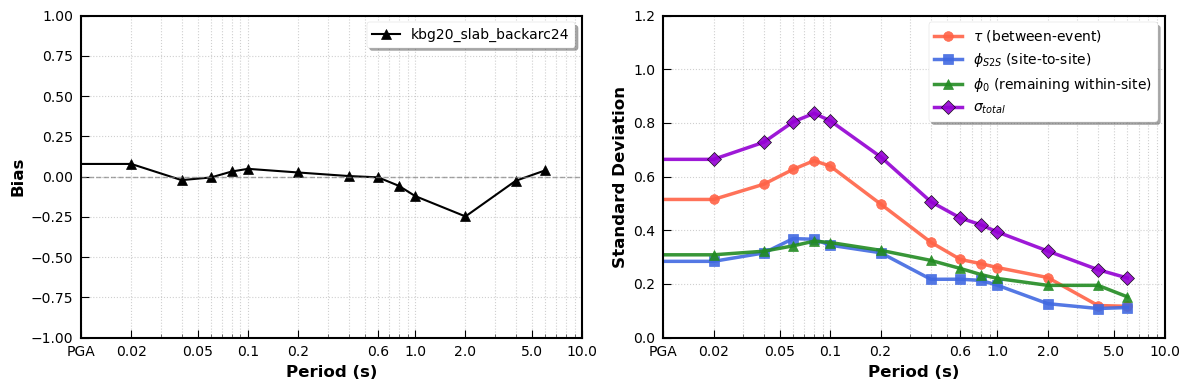

In [361]:
print('event type',events_select)
print('appendix',appendix)

# Create discrete colormap with 5 colors
from matplotlib.colors import ListedColormap
colors_discrete = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']  # Red, Blue, Green, Purple, Orange
cmap_discrete = ListedColormap(colors_discrete)

# Calculate total standard deviation
deltaTotal_list = [np.sqrt(tau**2 + phi_s2s**2 + phi_ws**2) 
                   for tau, phi_s2s, phi_ws in zip(deltaB_list, deltaS2S_list, deltaWS_list)]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(ped_list, bias_list, '-^', c='k', linewidth=1.5, zorder=2, 
             label=modelname + appendix)

axes[0].set_xscale('log')
axes[0].set_ylim([-1.0, 1.0])
axes[0].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Bias', fontsize=12, fontweight='bold')
axes[0].axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
axes[0].legend(loc='best', frameon=True, shadow=True, fontsize=10)
axes[0].grid(which='both', linestyle=':', alpha=0.6)
axes[0].tick_params(axis='both', which='major', labelsize=10)

axes[0].set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0])
axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.6', '1.0', '2.0', '5.0', '10.0']
axes[0].set_xticklabels(axeslabels)

# Second subplot - Standard deviation components + Total
axes[1].plot(ped_list, deltaB_list, '-o', c='tomato', label=r'$\tau$ (between-event)', 
             linewidth=2.5, markersize=7, alpha=0.9)
axes[1].plot(ped_list, deltaS2S_list, '-s', c='royalblue', label=r'$\phi_{S2S}$ (site-to-site)', 
             linewidth=2.5, markersize=7, alpha=0.9)
axes[1].plot(ped_list, deltaWS_list, '-^', c='forestgreen', label=r'$\phi_{0}$ (remaining within-site)', 
             linewidth=2.5, markersize=7, alpha=0.9)
axes[1].plot(ped_list, deltaTotal_list, '-D', c='darkviolet', label=r'$\sigma_{total}$', 
             linewidth=2.5, markersize=7, alpha=0.9, markeredgecolor='black', markeredgewidth=0.5)

axes[1].set_xscale('log')
axes[1].set_ylim([0.0, 1.2])
axes[1].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Standard Deviation', fontsize=12, fontweight='bold')
axes[1].legend(loc='best', frameon=True, shadow=True, fontsize=10)
axes[1].grid(which='both', linestyle=':', alpha=0.6)
axes[1].tick_params(axis='both', which='major', labelsize=10)

axes[1].set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0])
axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.6', '1.0', '2.0', '5.0', '10.0']
axes[1].set_xticklabels(axeslabels)

plt.tight_layout()

plt.savefig(modelname + '-' + events_select + appendix + '-biastot.png', dpi=300, bbox_inches='tight')

plt.show()

In [265]:
# Ray path density plot in 0.5° × 0.5° bins (counting unique rays)

from scipy.interpolate import interp1d
import matplotlib.colors as mcolors
from collections import defaultdict

# Define grid resolution
bin_size = 0.5

# Determine spatial extent
lon_min, lon_max = 166,180
lat_min, lat_max = -47,-34

# Create bins
lon_bins = np.arange(np.floor(lon_min), np.ceil(lon_max) + bin_size, bin_size)
lat_bins = np.arange(np.floor(lat_min), np.ceil(lat_max) + bin_size, bin_size)

# Use dictionary with sets to track unique rays per cell
ray_count_grid = defaultdict(set)

# Count unique ray paths passing through each grid cell
for idx, row in db3_s5_sel.iterrows():
    # Interpolate points along ray path
    n_points = 50  # Number of points along each ray
    lons = np.linspace(row['ev_lon'], row['sta_lon'], n_points)
    lats = np.linspace(row['ev_lat'], row['sta_lat'], n_points)
    
    # Assign each point to a grid cell and track the unique ray
    for lon, lat in zip(lons, lats):
        lon_idx = np.digitize(lon, lon_bins) - 1
        lat_idx = np.digitize(lat, lat_bins) - 1
        
        # Check bounds and add unique ray index to the cell's set
        if 0 <= lon_idx < len(lon_bins)-1 and 0 <= lat_idx < len(lat_bins)-1:
            ray_count_grid[(lat_idx, lon_idx)].add(idx)

# Convert to 2D array with unique ray counts
density_grid = np.zeros((len(lat_bins)-1, len(lon_bins)-1))

for (lat_idx, lon_idx), ray_set in ray_count_grid.items():
    density_grid[lat_idx, lon_idx] = len(ray_set)  # Count unique rays


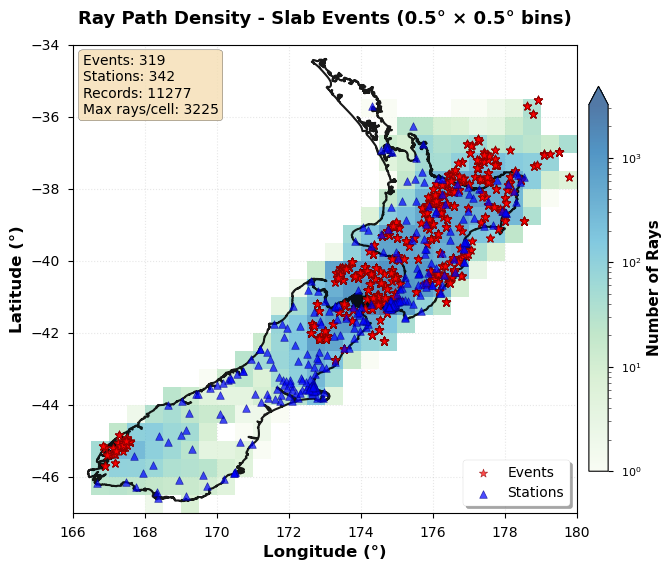

Grid statistics:
  Total grid cells: 728
  Cells with ray paths: 206
  Maximum rays in a cell: 3225
  Mean rays per cell (non-zero): 233.0
  Total unique rays: 11277


In [267]:

# Create the plot
fig, ax = plt.subplots(figsize=(7, 8))

# Plot density as a filled contour
lon_centers = (lon_bins[:-1] + lon_bins[1:]) / 2
lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2

# Mask zero values for better visualization
density_masked = np.ma.masked_where(density_grid == 0, density_grid)

# Plot with custom colormap
cmap = plt.cm.GnBu

norm = mcolors.LogNorm(vmin=max(1, density_masked.min()), vmax=density_masked.max())
im = ax.pcolormesh(lon_bins, lat_bins, density_masked, cmap=cmap, norm=norm, 
                    alpha=0.7, shading='auto', zorder=2)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.5, extend='max', pad=0.02)
cbar.set_label('Number of Rays', fontsize=11, fontweight='bold')

# Plot coastline on top
ax.plot(coast[0,:], coast[1,:], '-', c='black', linewidth=1.5, alpha=0.9, zorder=3)

# Plot event and station locations
ax.scatter(db3_s5_sel['ev_lon'], db3_s5_sel['ev_lat'], 
           marker='*', s=40, color='red', label='Events', 
           edgecolors='darkred', linewidth=0.5, alpha=0.7, zorder=4)

stations = db3_s5_sel[['sta_lon', 'sta_lat', 'sta']].drop_duplicates()
ax.scatter(stations['sta_lon'], stations['sta_lat'], 
           marker='^', s=30, color='blue', label='Stations', 
           edgecolors='darkblue', linewidth=0.5, alpha=0.7, zorder=4)

# Styling
ax.set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
ax.set_title(f'Ray Path Density - {events_select} Events ({bin_size}° × {bin_size}° bins)', 
             fontsize=13, fontweight='bold', pad=15)

# Add statistics text box
n_events = len(db3_s5_sel['evid'].unique())
n_stations = len(db3_s5_sel['sta'].unique())
n_records = len(db3_s5_sel)
max_density = int(density_grid.max())
textstr = f'Events: {n_events}\nStations: {n_stations}\nRecords: {n_records}\nMax rays/cell: {max_density}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props, zorder=5)

ax.legend(loc='lower right', frameon=True, shadow=True, fontsize=10)
ax.grid(True, which='both', linestyle=':', alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('ray_path_density_' + events_select + '.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Grid statistics:")
print(f"  Total grid cells: {(len(lon_bins)-1) * (len(lat_bins)-1)}")
print(f"  Cells with ray paths: {np.sum(density_grid > 0)}")
print(f"  Maximum rays in a cell: {int(density_grid.max())}")
print(f"  Mean rays per cell (non-zero): {density_grid[density_grid > 0].mean():.1f}")
print(f"  Total unique rays: {n_records}")

In [ ]:
# plot all models together

appendix='_slab_backarc24'
events_select = 'slab'


# Create discrete colormap with 5 colors
from matplotlib.colors import ListedColormap
colors_discrete = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']  # Red, Blue, Green, Purple, Orange
cmap_discrete = ListedColormap(colors_discrete)

fig, axes = plt.subplots(4, 1, figsize=(7, 12))

for imod, mod in enumerate(['atk22','ag20','kbg20','psbah22']):

    df_all = pd.read_csv(mod + '_resd/sigma_' + mod+ appendix+ '.csv')
    ped_list = df_all['period'].values
    bias_list = df_all['mu'].values
    deltaB_list = df_all['tau'].values
    deltaS2S_list = df_all['phiSS'].values
    deltaWS_list = df_all['phiWS'].values   

    # First subplot - Bias
    axes[0].plot(ped_list, bias_list, '-o',c=colors_discrete[imod], label = mod + ' ' + events_select, 
                linewidth=2, markersize=6, markerfacecolor='white', markeredgewidth=2)

    # Second subplot - Standard deviations
    axes[1].plot(ped_list, deltaB_list, '-o', c=colors_discrete[imod], 
                linewidth=2.5, markersize=7, alpha=0.9,label = mod + ' ' + events_select)
    
    axes[2].plot(ped_list, deltaS2S_list, '--s', c=colors_discrete[imod],
                linewidth=2.5, markersize=7, alpha=0.9,label = mod + ' ' + events_select)
    
    axes[3].plot(ped_list, deltaWS_list, ':^', c=colors_discrete[imod], 
                linewidth=2.5, markersize=7, alpha=0.9,label = mod + ' ' + events_select)

for i in range(4):
    axes[i].set_xscale('log')
    axes[i].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
    axes[i].grid(which='both', linestyle=':', alpha=0.6)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0])
    axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.6', '1.0', '2.0', '5.0', '10.0']
    axes[i].set_xticklabels(axeslabels)
    axes[i].set_ylim([0.0, 1.0])

axes[1].set_ylabel('Between-event Std Dev (τ)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Site-to-site Std Dev (φS2S)', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Within-site Std Dev (φws)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Bias', fontsize=12, fontweight='bold')


axes[0].set_xscale('log')
axes[0].set_ylim([-1.0, 1.0])
axes[0].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
axes[0].axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
axes[0].legend(loc='best', frameon=True, shadow=True, fontsize=10)
axes[0].grid(which='both', linestyle=':', alpha=0.6)
axes[0].tick_params(axis='both', which='major', labelsize=10)

axes[0].set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0])
axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.6', '1.0', '2.0', '5.0', '10.0']
axes[0].set_xticklabels(axeslabels)

plt.tight_layout()

plt.savefig('rup200mod'  + '-' + appendix + '-Bias.png', dpi=300, bbox_inches='tight')

# plt.show()

In [ ]:

events_select = 'slab'
mod = 'atk22'


# Create discrete colormap with 5 colors
from matplotlib.colors import ListedColormap
colors_discrete = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']  # Red, Blue, Green, Purple, Orange
cmap_discrete = ListedColormap(colors_discrete)

fig, axes = plt.subplots(2, 2, figsize=(9, 8))

for imod, appendix in enumerate(['_slab_false','_slab_backarc37','_slab_backarc24']):

    df_all = pd.read_csv(mod + '_resd/sigma_' + mod+ appendix+ '.csv')
    ped_list = df_all['period'].values
    bias_list = df_all['mu'].values
    deltaB_list = df_all['tau'].values
    deltaS2S_list = df_all['phiSS'].values
    deltaWS_list = df_all['phiWS'].values   

    # First subplot - Bias
    axes[0,0].plot(ped_list, bias_list, '-o',c=colors_discrete[imod], label = mod + ' ' + appendix, 
                linewidth=2, markersize=6, markerfacecolor='white', markeredgewidth=2)

    # Second subplot - Standard deviations
    axes[0,1].plot(ped_list, deltaB_list, '-o', c=colors_discrete[imod], 
                linewidth=2.5, markersize=7, alpha=0.9,label = mod + ' ' + appendix)
    
    axes[1,0].plot(ped_list, deltaS2S_list, '--s', c=colors_discrete[imod],
                linewidth=2.5, markersize=7, alpha=0.9,label = mod + ' ' + appendix)
    
    axes[1,1].plot(ped_list, deltaWS_list, ':^', c=colors_discrete[imod], 
                linewidth=2.5, markersize=7, alpha=0.9,label = mod + ' ' + appendix)

ax = axes.flatten()
for i in range(4):
    ax[i].set_xscale('log')
    ax[i].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
    ax[i].grid(which='both', linestyle=':', alpha=0.6)
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0])
    axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.6', '1.0', '2.0', '5.0', '10.0']
    ax[i].set_xticklabels(axeslabels)
    ax[i].set_ylim([0.2, 1.0])

ax[1].set_ylabel('Between-event Std Dev (τ)', fontsize=12, fontweight='bold')
ax[2].set_ylabel('Site-to-site Std Dev (φS2S)', fontsize=12, fontweight='bold')
ax[3].set_ylabel('Within-site Std Dev (φws)', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Bias', fontsize=12, fontweight='bold')


ax[0].set_xscale('log')
ax[0].set_ylim([-1.0, 1.0])
ax[0].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
ax[0].axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
ax[0].legend(loc='best', frameon=True, shadow=True, fontsize=10)
ax[0].grid(which='both', linestyle=':', alpha=0.6)
ax[0].tick_params(axis='both', which='major', labelsize=10)

ax[0].set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.6, 1.0, 2.0, 5.0, 10.0])
axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.6', '1.0', '2.0', '5.0', '10.0']
ax[0].set_xticklabels(axeslabels)

plt.tight_layout()

plt.savefig(mod   + '-all-'   + '-BiasStd.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Histogram of PSA recording counts

from GMfunc.prepare_resid_data import get_period_and_filter

psa_list = ['PGA', 'pSA_0.02', 'pSA_0.04', 'pSA_0.06', 'pSA_0.08', 'pSA_0.1', 
            'pSA_0.2', 'pSA_0.4', 'pSA_0.6', 'pSA_0.8', 'pSA_1.0', 
            'pSA_2.0', 'pSA_4.0', 'pSA_6.0', 'pSA_8.0', 'pSA_10.0']

# Extract period labels for x-axis
period_labels = []
for psa in psa_list:
    if psa == 'PGA':
        period_labels.append('PGA')
    else:
        period = psa.split('_')[1]
        period_labels.append(period)

# Count non-null recordings for each PSA column
recording_counts = []
for psa in psa_list:

    period,df_resd_used_filter = get_period_and_filter(psa,df_resd_used)

    if psa in df_resd_used_filter.columns:
        count = df_resd_used_filter[psa].notna().sum()
        recording_counts.append(count)
    else:
        recording_counts.append(0)

# Create the histogram plot
fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot with professional styling
bars = ax.bar(range(len(psa_list)), recording_counts, color='royalblue', 
               edgecolor='darkblue', linewidth=1.5, alpha=0.8)

# Add value labels on top of bars
for i, (bar, count) in enumerate(zip(bars, recording_counts)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count)}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Styling
ax.set_xlabel('Period (s)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Recordings', fontsize=12, fontweight='bold')
ax.set_title('Recording Counts by Spectral Period', fontsize=13, fontweight='bold', pad=15)
ax.set_xticks(range(len(psa_list)))
ax.set_xticklabels(period_labels, rotation=45, ha='right', fontsize=10)
ax.grid(axis='y', linestyle=':', alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

# Add summary statistics text box
total_recordings = sum(recording_counts)
avg_recordings = np.mean(recording_counts)
textstr = f'Total recordings: {total_recordings:,}\nAverage per period: {avg_recordings:.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig(modelname + '_recording_counts_by_period.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Recording counts for {len(psa_list)} PSA periods:")
for psa, count in zip(psa_list, recording_counts):
    print(f"  {psa:12s}: {count:6d} recordings")

In [ ]:
# print(df_single['site_id'].unique().__len__())
# print(df_single.groupby('site_id')['delta_S2S'].first())

# print(df_single['event_id'].unique().__len__())
# print(df_single.groupby('event_id')['delta_B'].first())

# print(df_single.groupby('site_id')['delta_WS'].__len__())

In [ ]:
# model = 'atk22_resd_vs30'
arcflag = 'backarc'

print(model,arcflag)

# df_m35 = pd.read_csv(model + '/' + 'resid_m'+ str(3.5)+ '-' + arcflag +'.csv')
# df_m4 = pd.read_csv(model + '/' + 'resid_m'+ str(4.0)+ '-' + arcflag +'.csv')

# df_m45 = pd.read_csv(model + '/' + 'resid_m'+ str(4.5)+ '-' + arcflag +'.csv')

# df_m5 = pd.read_csv(model + '/' + 'resid_m'+ str(5.0)+ '-' + arcflag +'.csv')
# df_m55 = pd.read_csv(model + '/' + 'resid_m'+ str(5.5)+ '-' + arcflag +'.csv')

# df_m6 = pd.read_csv(model + '/' + 'resid_m'+ str(6.0)+ '-' + arcflag +'.csv')
# df_m65 = pd.read_csv(model + '/' + 'resid_m'+ str(6.5)+ '-' + arcflag +'.csv')

# df_m7 = pd.read_csv(model + '/' + 'resid_m'+ str(7.0)+ '-' + arcflag +'.csv')

# df_combined = pd.concat([df_m7,df_m45,df_m5,df_m55,df_m6,df_m65],ignore_index=True)

# df_combined.to_csv(model+'/' + 'resid_comb_m45-m7-'+ arcflag + '.csv',index=False)

ag20_resd backarc


In [ ]:
import importlib, GMfunc.gmpe_residual_plots
importlib.reload(GMfunc.gmpe_residual_plots)

from GMfunc.gmpe_residual_plots import plot_residual_analysis,print_residual_statistics
from GMfunc.gmpe_residual_plots import plot_resid_s2s

# model = 'atk22_resd_vs30'
# # model = 'bchydro_resd'
# arcflag = 'forearc'

# df_combined = pd.read_csv(model+'/' + 'resid_comb_m35-m7-'+arcflag +'.csv')

# obs_df_all = pd.DataFrame({
#     'event_id': df_combined['event_id'], 
#     'site_id': df_combined['site_id'], 
#     'magnitude': df_combined['magnitude'], 
#     'distance': df_combined['distance_km'], 
#     'residual': df_combined['resid'],
#     # 'Vs30': df_combined['Vs30'],
# })

# Your DataFrame should have columns:
# ['event_id', 'site_id', 'magnitude', 'distance', 'residual']


# Print detailed statistics
print_residual_statistics(obs_df_all)



In [ ]:
# Generate the plots

# importlib.reload(GMfunc.gmpe_residual_plots)
# from GMfunc.gmpe_residual_plots import plot_resid_s2s

# fig, axes = plot_residual_analysis(obs_df_all)
# plt.show()

# print(obs_df_all.keys())
# fig,axes = plot_resid_s2s(obs_df_all)



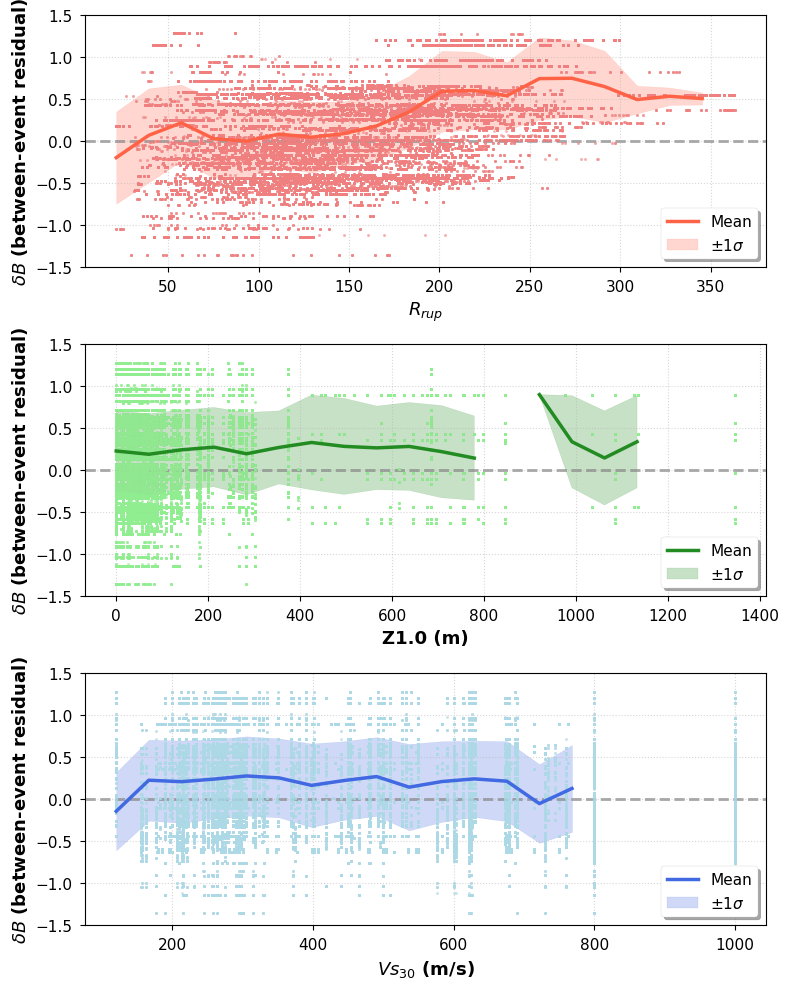

In [ ]:
# source term dependency

# df_v2_sub3['event_id'] = df_v2_sub3['evid']
modelname = 'atk22'
appendix = '_slab_backarc24'
output_dir = modelname + '_resd/'
# output_dir = 'resd_atk22_inter/'

db3_tb = pd.read_csv('rotD50/rot50_slab_m4_mw.csv')

df_single_imt = pd.read_csv(output_dir + 'M4reg-resid_PGA-'+ modelname + appendix+'.csv')

df_single_imt['evid'] = df_single_imt['event_id'].astype(str)
df_event_merge = pd.merge(df_single_imt, db3_tb, on=["evid"], how="inner")


figname = 'site-pga-'+ modelname +  appendix +'-m4.png'


import importlib
import GMfunc.plot_pga_gmpe
importlib.reload(GMfunc.plot_pga_gmpe)
from GMfunc.plot_pga_gmpe import bin_mean_std, bin_mean_err

nbins = 20
mean_bin, std_bins, rhypo_bins = bin_mean_std(nbins, 10**df_event_merge['event_term'].values, df_event_merge['r_rup'].values)  

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# First subplot - Magnitude dependency
axes[0].plot(df_event_merge['r_rup'], df_event_merge['event_term'], '.', alpha=0.15, color='lightcoral', markersize=4)

axes[0].plot(rhypo_bins, mean_bin, '-', color='tomato', linewidth=2.5, label='Mean', zorder=5)
axes[0].fill_between(rhypo_bins, mean_bin - std_bins, mean_bin + std_bins, color='tomato', alpha=0.25, label=r'$\pm 1\sigma$')

axes[0].set_xlabel(r'$R_{rup}$', fontsize=13, fontweight='bold')
axes[0].set_ylabel(r'$\delta B$ (between-event residual)', fontsize=13, fontweight='bold')
# axes[0].set_ylabel(r'bias', fontsize=13, fontweight='bold')

axes[0].legend(loc='best', frameon=True, shadow=True, fontsize=11)
axes[0].set_ylim([-1.5, 1.5])
axes[0].axhline(y=0, xmin=0, xmax=1, linewidth=2, color='gray', linestyle='--', alpha=0.7, zorder=1)
axes[0].grid(which='both', linestyle=':', alpha=0.5)
axes[0].tick_params(axis='both', which='major', labelsize=11)



# Second subplot - Depth dependency
nbins = 20
mean_bin, std_bins, rhypo_bins = bin_mean_std(nbins, 10**df_event_merge['event_term'].values, df_event_merge['Z1.0'].values)  

axes[1].plot(df_event_merge['Z1.0'], df_event_merge['event_term'], '.', alpha=0.15, color='lightgreen', markersize=4)

axes[1].plot(rhypo_bins, mean_bin, '-', color='forestgreen', linewidth=2.5, label='Mean', zorder=5)
axes[1].fill_between(rhypo_bins, mean_bin - std_bins, mean_bin + std_bins, color='forestgreen', alpha=0.25, label=r'$\pm 1\sigma$')

axes[1].set_xlabel('Z1.0 (m)', fontsize=13, fontweight='bold')
axes[1].set_ylabel(r'$\delta B$ (between-event residual)', fontsize=13, fontweight='bold')
# axes[1].set_ylabel(r'bias', fontsize=13, fontweight='bold')

axes[1].legend(loc='best', frameon=True, shadow=True, fontsize=11)
axes[1].set_ylim([-1.5, 1.5])
axes[1].axhline(y=0, xmin=0, xmax=1, linewidth=2, color='gray', linestyle='--', alpha=0.7, zorder=1)
axes[1].grid(which='both', linestyle=':', alpha=0.5)
axes[1].tick_params(axis='both', which='major', labelsize=11)



# Third subplot - z_tor dependency
mean_bin, std_bins, rhypo_bins = bin_mean_std(nbins, 10**df_event_merge['event_term'].values, df_event_merge['Vs30'].values)  

axes[2].plot(df_event_merge['Vs30'], df_event_merge['event_term'], '.', alpha=0.15, color='lightblue', markersize=4)

axes[2].plot(rhypo_bins, mean_bin, '-', color='royalblue', linewidth=2.5, label='Mean', zorder=5)
axes[2].fill_between(rhypo_bins, mean_bin - std_bins, mean_bin + std_bins, color='royalblue', alpha=0.25, label=r'$\pm 1\sigma$')

axes[2].set_xlabel(r'$Vs_{30}$ (m/s)', fontsize=13, fontweight='bold')
axes[2].set_ylabel(r'$\delta B$ (between-event residual)', fontsize=13, fontweight='bold')
# axes[2].set_ylabel(r'bias', fontsize=13, fontweight='bold')

axes[2].legend(loc='best', frameon=True, shadow=True, fontsize=11)
axes[2].set_ylim([-1.5, 1.5])
axes[2].axhline(y=0, xmin=0, xmax=1, linewidth=2, color='gray', linestyle='--', alpha=0.7, zorder=1)
axes[2].grid(which='both', linestyle=':', alpha=0.5)
axes[2].tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.savefig(figname, dpi=300, bbox_inches='tight')
plt.show()


In [282]:

modelname = 'atk22'
output_dir = modelname + '_resd/'

fig, ax = plt.subplots(1, 2, figsize=(8, 4))


for imag, mag in enumerate(['M4','M5','M6']): # backarc station

    output_dir = modelname + '_resd/'    
            

    df_single_imt = pd.read_csv(output_dir + '/'+mag + '-sigma_' + modelname + appendix+'.csv')


    ped_list = df_single_imt['period'].values
    bias_list = df_single_imt['mu'].values
    deltaB_list = df_single_imt['tau'].values
    deltaS2S_list = df_single_imt['phiSS'].values
            

    # Left subplot - Site-to-site residual
    ax[0].plot(ped_list, bias_list, '-o', c=colors_discrete[imag], label=mag, 
               linewidth=2.5, markersize=7, alpha=0.9)
    ax[1].plot(ped_list, deltaB_list, '--o', c=colors_discrete[imag], label=mag, 
               linewidth=2.5, markersize=7, alpha=0.9)

    
ax[0].axhline(y=0, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
ax[0].set_ylim([-2.5, 2.5])
ax[0].set_xscale('log')
ax[0].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
ax[0].set_ylabel(r'bias', fontsize=12, fontweight='bold')
ax[0].set_title('model bias', fontsize=13, fontweight='bold')
ax[0].legend(loc='best', frameon=True, shadow=True, fontsize=11)
ax[0].grid(which='both', linestyle=':', alpha=0.5)
ax[0].tick_params(axis='both', which='major', labelsize=10)

ax[1].set_ylim([0.2, 1.0])
ax[1].set_xscale('log')
ax[1].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
ax[1].set_ylabel(r'between-event std', fontsize=12, fontweight='bold')
ax[1].legend(loc='best', frameon=True, shadow=True, fontsize=11)
ax[1].grid(which='both', linestyle=':', alpha=0.5)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('bias-' + modelname + appendix +'.png', dpi=300, bbox_inches='tight')

plt.close()

In [143]:

sitefile = '/Users/DuoL/Documents/NSHM/Attenuation/NZGMDB/quality/site_table.csv'
siteTable = pd.read_csv(sitefile)

siteTable_sub = pd.DataFrame(
    {
        'site_id': siteTable['sta'],
        'sta_lon': siteTable['lon'],
        'sta_lat': siteTable['lat'],
        'vs30': siteTable['Vs30'],
    }
)

print(siteTable_sub.__len__())

# df_single = pd.DataFrame({
#     'event_id': df_resd_all['evid'],
#     'site_id': df_resd_all['sta'],
#     'resid': df_resd_all['PGA'],
#     'Vs30': df_resd_all['Vs30'],
#     'mag': df_resd_all['mag'],
# })

# df_single['event_id'] = df_single['event_id'].astype(str)

# res = mixed_decompose(df_single,min_events_per_site=5)
# df_resd = prepare_residual_data(df_single)


# print(db3_s5['sta'].unique())


389


In [742]:
print(backarc_list)

df_v2_forearc=df_v2_sub3[(~df_v2_sub3['sta'].isin(backarc_list))]

db3_s5_backarc = db3_s5_sel[db3_s5_sel['sta'].isin(backarc_list)]
# df_v2_backarc=df_v2_sub3[df_v2_sub3['sta'].isin(backarc_list)]

db3_s5_backarc.groupby('sta')['evid'].nunique()
# plt.plot(figsize=(5,4))
# plt.hist(db3_s5_backarc.groupby('sta')['evid'].nunique(),bins=np.linspace(0,80,20))
# plt.xlabel('recorded slab events')
# plt.ylabel('No.')
# plt.show()



['NPCS' 'TPPS' 'WAIS' 'ROPS' 'KAFS' 'HUKS' 'INHS' 'WCZ' 'VRZ' 'TBCS'
 'TUHS' 'WVHS' 'KUZ' 'KAPS' 'MWFS' 'HWHS' 'TOZ' 'GRZ' 'EDAS' 'OPSS' 'RPCS'
 'ROTS' 'HIZ' 'HBHS' 'TMHS' 'MAGS' 'TACS' 'MMCS' 'TIRS' 'TKHS' 'TLZ'
 'PTHS' 'AKUS' 'OUZ' 'WBHS' 'WTAZ' 'TGRZ']


sta
GRZ      1
HIZ      5
HUKS    11
HWHS    19
INHS    10
KAFS    12
KUZ      4
MWFS     9
NPCS    10
OPSS    15
ROTS     2
RPCS     5
TACS     1
TBCS     3
TIRS     5
TKHS     2
TLZ      1
TOZ      1
TPPS     9
TUHS    12
VRZ     10
WAIS     7
Name: evid, dtype: int64

In [ ]:
# site term dependency


psa_list = ['resid_PGA','resid_pSA_0.02','resid_pSA_0.04','resid_pSA_0.06','resid_pSA_0.08',
            'resid_pSA_0.1','resid_pSA_0.2','resid_pSA_0.4', 'resid_pSA_0.6','resid_pSA_0.8',
            'resid_pSA_1.0','resid_pSA_2.0','resid_pSA_4.0','resid_pSA_6.0','resid_pSA_8.0','resid_pSA_10.0']
ped_list = [0.0,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1.0,2.0,4.0,6.0,8.0,10.0]

print('backarc_list_24:',backarc_list_24)

modelname = 'atk22'
appendix = '-slab-backarc24'
# output_dir = 'resd_atk22_inter/'
output_dir = modelname + '_resd/'

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sta1 = 'NPCS' # 'TOZ'  # or 'TOZ'
# sta1 = 'PWZ' #'KNZ'
# sta1 = 'WCDS' # 'INHS'

for imod, mod in enumerate(['atk22','psbah22']): # backarc station

    output_dir = mod + '_resd/'

    deltaS2S_list=[]
    deltaWS_list=[]

            
    for ipsa, psa in enumerate(psa_list):
            
        try:
            
            df_single_imt = pd.read_csv(output_dir + '/'+'reg-'+ psa + '-'+ mod + appendix+'.csv')

            df_site_merge = pd.merge(df_single_imt, siteTable_sub, on=["site_id"], how="inner")

            deltaS2S_list.append(df_site_merge[df_site_merge['site_id']==sta1]['site_term'].values[0])
            deltaWS_list.append(df_site_merge[df_site_merge['site_id']==sta1]['eps_single'].values[0])  

        except:
            deltaS2S_list.append(np.nan)
            deltaWS_list.append(np.nan)  
            print('no data for ',psa,mod,sta1)
            

    print(deltaS2S_list)

    # Left subplot - Site-to-site residual
    ax[0].plot(ped_list, deltaS2S_list, '-o', c=colors_discrete[imod], label=mod , 
               linewidth=2.5, markersize=7, alpha=0.9)
    

    # Right subplot - Within-site residual
    ax[1].plot(ped_list, deltaWS_list, '--s', c=colors_discrete[imod], label=mod,
               linewidth=2.5, markersize=7, alpha=0.9)
    
ax[1].axhline(y=0, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
ax[1].set_ylim([-2.5, 2.5])
ax[1].set_xscale('log')
ax[1].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
ax[1].set_ylabel(r'$\epsilon$ (remaining site residual)', fontsize=12, fontweight='bold')
ax[1].set_title('Within-Site Residual', fontsize=13, fontweight='bold')
ax[1].legend(loc='best', frameon=True, shadow=True, fontsize=11)
ax[1].grid(which='both', linestyle=':', alpha=0.5)
ax[1].tick_params(axis='both', which='major', labelsize=10)

ax[0].axhline(y=0, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
ax[0].set_ylim([-2.5, 2.5])
ax[0].set_xscale('log')
ax[0].set_xlabel('Period (s)', fontsize=12, fontweight='bold')
ax[0].set_ylabel(r'$\delta S_{2S}$ (site term)', fontsize=12, fontweight='bold')
ax[0].set_title('Site-to-Site Residual', fontsize=13, fontweight='bold')
ax[0].legend(loc='best', frameon=True, shadow=True, fontsize=11)
ax[0].grid(which='both', linestyle=':', alpha=0.5)
ax[0].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('WithinSite-resid-' +sta1 + appendix +'.png', dpi=300, bbox_inches='tight')

plt.close()


backarc_list_24: ['ROPS' 'WCZ' 'TBCS' 'KUZ' 'KAPS' 'MWFS' 'TOZ' 'GRZ' 'ROTS' 'HIZ' 'HBHS'
 'TMHS' 'MAGS' 'TACS' 'MMCS' 'TIRS' 'TKHS' 'TLZ' 'PTHS' 'AKUS' 'OUZ'
 'WBHS' 'WTAZ' 'TGRZ']
no data for  resid_pSA_10.0 atk22 NPCS
[0.1176947865440239, 0.0868933475833429, -0.0094776302114374, -0.0683614705686527, 0.0275092590209292, 0.02864461027176, 0.0746092066916586, 0.6297194497931257, 0.3850758665336964, 0.2873414023958361, 0.303314463957155, 0.2238421167701035, 0.3618437479790302, 0.408731764394578, 0.1906502581437268, nan]
no data for  resid_pSA_10.0 psbah22 NPCS
[0.1773468891101803, 0.1516223720156333, 0.0701654333770756, 0.0220998497626348, 0.1229655782514535, 0.1246932737165206, 0.1506996483072896, 0.6848835786711582, 0.4367605752793698, 0.3464064315361024, 0.3617396294146456, 0.2518678117639023, 0.3700919474770499, 0.4587977022104287, 0.2544252710860949, nan]


In [501]:
# nz coastline data
coastfile = '../Geometry/CoastNorth.txt.npy'
coast =  np.load(coastfile)
print(coast.shape)

coastfile = '../Geometry/CoastSouth.txt'
coastall = np.loadtxt(coastfile)
coast2 = np.array([coastall[1,:],coastall[0,:]])
print(coast2.shape)

coast = np.concatenate((coast,coast2),axis=1)
print(coast.shape)

(2, 38487)
(2, 37220)
(2, 75707)


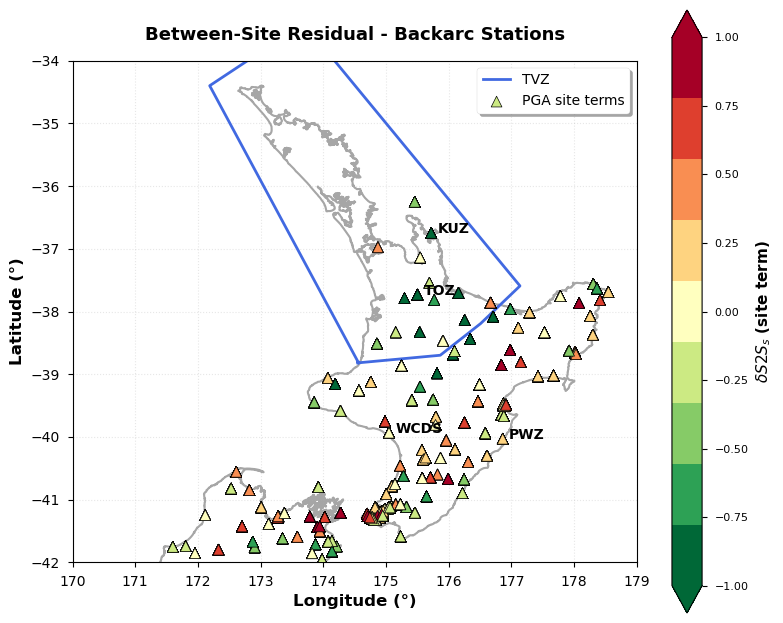

In [ ]:
# site parameter dependence
appendix = '-slab-backarc24'
modelname = 'atk22'
output_dir = modelname + '_resd/'
df_single_imt = pd.read_csv(output_dir + '/'+'reg-resid_PGA'+ '-'+modelname + appendix+ '.csv')

df_site_merge = pd.merge(df_single_imt, siteTable_sub, on=["site_id"], how="inner")

fig, ax = plt.subplots(figsize=(8, 7))

cmap = plt.get_cmap('RdYlGn_r', 9)

sta_list = ['TOZ','KUZ','PWZ','WCDS']

subsite_plot= siteTable_sub[siteTable_sub['site_id'].isin(sta_list)]


# Plot coastline and TVZ boundary
ax.plot(coast[0,:], coast[1,:], '-', c='gray', linewidth=1.5, alpha=0.7, zorder=1)
ax.plot(tvztable['longitude'], tvztable['latitude'], '-', c='royalblue', 
        linewidth=2, label='TVZ', zorder=2)

# Plot backarc stations
# ax.plot(db3_s5['sta_lon'], db3_s5['sta_lat'], 'o', color='orange', 
#         markersize=8, label='Backarc stations', markeredgecolor='darkorange',
#         markeredgewidth=1.5, alpha=0.8, zorder=3)

# Uncomment to show site terms as colored points
scatter = ax.scatter(df_site_merge['sta_lon'], df_site_merge['sta_lat'],
                     c=df_site_merge['site_term'], s=60, marker='^',
                     vmax=1.0, vmin=-1.0, cmap=cmap, label='PGA site terms',
                     edgecolors='black', linewidth=0.5, zorder=4)
clb = plt.colorbar(scatter, ax=ax, shrink=0.7, extend='both')
clb.set_label(r'$\delta {S2S}_s$ (site term)', fontsize=11, fontweight='bold')


# Option 2: Using vectorized iteration with zip
for lon, lat, site_id in zip(subsite_plot['sta_lon'], 
                               subsite_plot['sta_lat'], 
                               subsite_plot['site_id']):
    ax.text(lon + 0.1, lat, site_id, 
            fontsize=10, fontweight='bold', color='black', zorder=5)

# Set axis limits and labels
xmin, xmax, ymin, ymax = 170, 179, -42, -34
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('Longitude (°)', fontsize=12, fontweight='bold')
ax.set_ylabel('Latitude (°)', fontsize=12, fontweight='bold')
ax.set_title('Between-Site Residual - Backarc Stations', fontsize=13, fontweight='bold', pad=15)

# Styling
ax.legend(loc='best', frameon=True, shadow=True, fontsize=10)
ax.grid(True, which='both', linestyle=':', alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('backarc-stations-pga-back.png', dpi=300, bbox_inches='tight')
plt.show()


In [695]:
# print(siteTable.keys())
# dist_tvz_site =  point_to_polygon_distance_vectorized(siteTable[['lon','lat']].values, tvztable[['longitude','latitude']].values)

# siteTable['dist_tvz']=dist_tvz_site

# print(siteTable[dist_tvz_site<=0.01].__len__)

print(siteTable[siteTable['sta']=='ROPS']['lon'])

234    176.254504
Name: lon, dtype: float64


In [252]:
# df=pd.DataFrame({
#     'longitude': coast[0,:],
#     'latitude': coast[1,:]
# })
# df.to_csv('coastline.csv',index=False)

print(coast.shape)


(2, 75707)


#### Mixed-effect regression analysis

In [326]:
# df has columns: event_id, site_id, resid = ln(obs) - ln(pred)

import StatsModel.decompose_residuals
importlib.reload(StatsModel.decompose_residuals)

from StatsModel.decompose_residuals import mixed_decompose

# mask = df_v2_sub3['mag'].between(4.25,4.75,inclusive='both')
# df_v2_m4 = df_v2_sub3[mask].copy()

# df_sub = pd.DataFrame({
#     'event_id': df_v2_m4['evid'],
#     'site_id': df_v2_m4['sta'],
#     'resid': df_v2_m4['resid_PGA'],
# })

df_resd_all = pd.read_csv(output_dir+'/resid_inter_m6.0.csv')

df_sub = pd.DataFrame({
    'event_id': df_resd_all['event_id'],
    'site_id': df_resd_all['site_id'],
    'resid': df_resd_all['PGA'],
})

# mixed-effect fix 

df_sub['event_id']=df_sub['event_id'].astype(str)

res = mixed_decompose(df_sub,min_events_per_site=5)

print("μ (fixed intercep; model bias):", res["mu"])
print("τ (between-event):  ", res["tau"])
print("φ_S2S (between-site):", res["phi_S2S"])
print("φ0 (model, empirical):", res["phi0_model"], res["phi0_empirical"])

event_terms = res["event_effects"]   # η̂_i per event
site_terms  = res["site_effects"]    # δ̂_k per site (shrinkage/EBLUP)
parts = res["df_components"]         # per-record decomposition incl. ε_single

# output table 
dc = res["df_components"].copy()

mu = res["mu"]
ok = np.allclose(dc["resid"], mu + dc["event_term"] + dc["site_term"] + dc["eps_single"], atol=1e-10)
print("Per-record identity holds:", ok)


μ (fixed intercep; model bias): 0.5335375618003114
τ (between-event):   0.8744303437579111
φ_S2S (between-site): 0.35189643872415
φ0 (model, empirical): 0.5085540339766172 0.6034953908328738
Per-record identity holds: True


In [ ]:
# import statsmodels as sm
# import inspect
# print("statsmodels:", sm.__version__)

# from statsmodels.regression.mixed_linear_model import MixedLM
# print("vc_formula in signature?",
#       "vc_formula" in inspect.signature(MixedLM).parameters)

statsmodels: 0.14.5
vc_formula in signature? False


#### Dumped

In [ ]:
# Residual analysis: Plain
from GMfunc.gmpe_residual_plots import prepare_residual_data

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
psa_list = ['PGA','pSA_0.02','pSA_0.05','pSA_0.04','pSA_0.06','pSA_0.07','pSA_0.08','pSA_0.09','pSA_0.1','pSA_0.2','pSA_0.5','pSA_1.0','pSA_2.0','pSA_5.0','pSA_10.0']

ped_list = [0.0,0.02,0.05,0.04,0.06,0.07,0.08,0.09,0.1,0.2,0.5,1.0,2.0,5.0,10.0]

deltaB_list = []
deltaS2S_list = []
deltaWS_list = []
bias_list = []

for ipsa, psa in enumerate(psa_list):

    df_single = pd.DataFrame({
        'event_id': df_resd_all['event_id'],
        'site_id': df_resd_all['site_id'],
        'residual': df_resd_all[psa]
    })
    prepare_residual_data(df_single)
    
    site_resid = df_single.groupby("site_id")["delta_S2S"].first()
    event_resid = df_single.groupby("event_id")["delta_B"].first()
    ws_resid = df_single.groupby("site_id")["delta_WS"].first()

    bias_list.append(np.mean(df_single['residual']))
    deltaB_list.append(event_resid.median())
    deltaS2S_list.append(site_resid.median())
    deltaWS_list.append(ws_resid.median())

# Plot residual components
axes.plot(ped_list, deltaB_list, '-o', c='tomato', label=r'$\tau$ (between-event)', 
          linewidth=2.5, markersize=7, alpha=0.9)
axes.plot(ped_list, deltaS2S_list, '-s', c='royalblue', label=r'$\phi_{S2S}$ (site-to-site)', 
          linewidth=2.5, markersize=7, alpha=0.9)
axes.plot(ped_list, deltaWS_list, '-^', c='forestgreen', label=r'$\phi_0$ (within-event)', 
          linewidth=2.5, markersize=7, alpha=0.9)

# Styling
axes.axhline(y=0, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
axes.set_xscale('log')
axes.set_ylim([-1.2, 1.2])
axes.set_xlabel('Period (s)', fontsize=12, fontweight='bold')
axes.set_ylabel('Median Residual', fontsize=12, fontweight='bold')
axes.set_title('Residual Analysis by Period', fontsize=13, fontweight='bold', pad=15)
axes.legend(loc='best', frameon=True, shadow=True, fontsize=11)
axes.grid(which='both', linestyle=':', alpha=0.5)
axes.tick_params(axis='both', which='major', labelsize=10)

axes.set_xticks([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0])
axeslabels = ['PGA', '0.02', '0.05', '0.1', '0.2', '0.5', '1.0', '2.0', '5.0', '10.0']
axes.set_xticklabels(axeslabels)

plt.tight_layout()
plt.savefig(modelname + '_inter_bias.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import importlib

import GMfunc.prepare_resid_data

importlib.reload(GMfunc.prepare_resid_data)
from GMfunc.prepare_resid_data import create_resid_table_band

from pathlib import Path


mag_list= [4.0,4.5,5.0,5.5,6.0]

sa_list = ['sa002','sa004','sa006','sa008','sa01','sa02','sa05','sa1','sa2','sa5','sa10','pga']
psa_list = ['pSA_0.02','pSA_0.04','pSA_0.06','pSA_0.08',
            'pSA_0.1','pSA_0.2','pSA_0.5','pSA_1.0','pSA_2.0','pSA_5.0','pSA_10.0','PGA']


backarc_flag = False

modelname  = 'atk22'
gmpefile_dir = '/Users/DuoL/Documents/NSHM/Attenuation/atk22_'

outdir = Path(modelname + '_resd/')
outdir.mkdir(parents=True, exist_ok=True)

if backarc_flag:
    arcflag = 'backarc'
else:
    arcflag = 'forearc'

print(arcflag)

for ik,mag1 in enumerate(mag_list):

    create_resid_table_band(df_input=df_band_all,gmpefile_dir=gmpefile_dir,modelname=modelname,model_tag=model_tag,
                            backarc_flag=backarc_flag,sa_list=sa_list,psa_list=psa_list,magnitude=mag1)



In [ ]:
# merge df for all componnets


# sa_list = ['sa002','sa005','sa01','sa02','sa05','sa1','sa2','sa5','sa10']
# psa_list = ['pSA_0.02','pSA_0.05','pSA_0.1','pSA_0.2','pSA_0.5','pSA_1.0','pSA_2.0','pSA_5.0','pSA_10.0']

sa_list = ['sa002','sa004','sa006','sa008','sa01','sa02','sa05','sa1','sa2','sa5','sa10']
psa_list = ['pSA_0.02','pSA_0.04','pSA_0.06','pSA_0.08',
            'pSA_0.1','pSA_0.2','pSA_0.5','pSA_1.0','pSA_2.0','pSA_5.0','pSA_10.0']


# modelname  = 'ag20'
# gmpefile_dir = '/Users/DuoL/Documents/NSHM/Attenuation/ag20_'

output_dir = modelname + '_resd/'

mag1 = 5.0

arcflag = 'forearc'

df_resd_all = pd.read_csv(output_dir + "/resid_"+model_tag+"_pga"  + "_m" + str(mag1) + "-" + arcflag + ".csv")


for isa, sa in enumerate(sa_list):

    df_new = pd.read_csv(output_dir + "/resid_"+model_tag+"_" + sa + "_m" + str(mag1) + "-" + arcflag + ".csv")
    df_resd_all = pd.merge(df_resd_all,df_new, on=["event_id","site_id","magnitude","distance_km"], how="left")

print(df_resd_all.keys())

df_resd_all.to_csv(output_dir+'/resid_'+model_tag+'_m'+str(mag1)+'.csv')


In [ ]:
# merge magnitude
mag_list= [4.0,4.5,5.0,5.5,6.0]

df_resd_all = pd.read_csv(output_dir + "/resid_"+model_tag  + "_m" + str(mag1) + ".csv")


for imag,mag1 in enumerate(mag_list):

    df_new = pd.read_csv(output_dir + "/resid_"+model_tag+"_m" + str(mag1) +  ".csv")
    df_resd_all = pd.concat([df_new,df_resd_all],ignore_index=True)

print(df_resd_all.keys())

df_resd_all.to_csv(output_dir+'/resid_'+model_tag+'_allmag' + '.csv')

